## Imports

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling & preprocessing imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer

# Pandas display option
pd.set_option('display.max_columns', 100)


# Loading Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
url1 ='/content/drive/MyDrive/Mimic_finale.csv'


In [4]:
# Load in the file as a Pandas dataframe named Mimic_df
Mimic_df=pd.read_csv(url1)

##   Data exploration and Data Cleaning


In [5]:
Mimic_df.shape

(27395, 50)

There are 27395 rows and 50 columns

Checking the data types:

In [7]:
# Obtain summary information with .info()
Mimic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27395 entries, 0 to 27394
Data columns (total 50 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SUBJECT_ID             27395 non-null  int64  
 1   HADM_ID                27395 non-null  int64  
 2   DISCHTIME              27395 non-null  object 
 3   DEATHTIME              3184 non-null   object 
 4   ADMISSION_TYPE         27395 non-null  object 
 5   ADMISSION_LOCATION     27395 non-null  object 
 6   DISCHARGE_LOCATION     27395 non-null  object 
 7   INSURANCE              27395 non-null  object 
 8   LANGUAGE               19091 non-null  object 
 9   RELIGION               27362 non-null  object 
 10  MARITAL_STATUS         26013 non-null  object 
 11  ETHNICITY              27395 non-null  object 
 12  EDREGTIME              15784 non-null  object 
 13  EDOUTTIME              15784 non-null  object 
 14  DIAGNOSIS              27382 non-null  object 
 15  HO

In [8]:
# Preview the first 5 rows with .head()
Mimic_df.head(5)

,SUBJECT_ID,HADM_ID,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA,GENDER,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG,ICUSTAY_ID,FIRST_CAREUNIT,LAST_CAREUNIT,FIRST_WARDID,LAST_WARDID,INTIME,OUTTIME,LOS,AGE PATIENT,CD9_CODE_DIAGNOSIS,LONG_TITLE_DIAGNOSIS,CD9_CODE_PROCEDURES,LONG_TITLE_PROCEDURES,FORMULARY_DRUG_CD,PROD_STRENGTH,DOSE_VAL_RX,FORM_VAL_DISP,DRUG,DRUG_TYPE,SPEC_ITEMID,SPEC_TYPE_DESC,ORG_ITEMID,ORG_NAME,ISOLATE_NUM,AB_ITEMID,INTERPRETATION,DILUTION_VALUE,AB_NAME
0,23,152223,2153-09-08 19:10:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,NaN,CATHOLIC,MARRIED,WHITE,NaN,NaN,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,0,1,1,NaN,NaN,NaN,0,227807,CSRU,CSRU,14,14,2153-09-03 09:38:55,2153-09-04 15:59:11,1.2641,71,41401,Coronary atherosclerosis of native coronary ar...,151,Excision of lesion or tissue of cerebral meninges,SW50,50 mL Bag,50,1,SW,BASE,70064.0,STOOL,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25,129635,2160-11-05 14:55:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2160-11-02 01:01:00,2160-11-02 04:27:00,ACUTE CORONARY SYNDROME,0,1,1,NaN,NaN,NaN,0,203487,CCU,CCU,7,7,2160-11-02 03:16:23,2160-11-05 16:23:27,3.5466,59,41071,"Subendocardial infarction, initial episode of ...",3607,Insertion of drug-eluting coronary artery sten...,HEPAPREMIX,"25,000 unit Premix Bag","25,000",1,Heparin Sodium,MAIN,70012.0,BLOOD CULTURE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,26,197661,2126-05-13 15:00:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Medicare,NaN,CATHOLIC,SINGLE,UNKNOWN/NOT SPECIFIED,NaN,NaN,V-TACH,0,1,1,2128-02-25 00:00:00,NaN,2128-02-25 00:00:00,1,244882,CCU,CCU,57,57,2126-05-07 09:52:30,2126-05-09 13:15:05,2.1407,72,41401,Coronary atherosclerosis of native coronary ar...,3794,Implantation or replacement of automatic cardi...,DOFE250,250MCG CAP,250,1,Dofetilide,MAIN,70012.0,BLOOD CULTURE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,31,128652,2108-08-30 15:00:00,2108-08-30 15:00:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Medicare,NaN,CATHOLIC,MARRIED,WHITE,NaN,NaN,STATUS EPILEPTICUS,1,1,1,2108-08-30 00:00:00,2108-08-30 00:00:00,2108-08-30 00:00:00,1,254478,MICU,MICU,15,15,2108-08-22 23:28:42,2108-08-30 21:59:20,7.9379,73,486,"Pneumonia, organism unspecified",114,Open biopsy of brain,PHEN130I,130mg/mL Vial,400,3.08,Phenobarbital Sodium,MAIN,70012.0,BLOOD CULTURE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,34,115799,2186-07-20 16:00:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,NaN,NaN,CHEST PAIN\CATH,0,1,1,2192-01-30 00:00:00,NaN,2192-01-30 00:00:00,1,263086,MICU,MICU,23,23,2186-07-18 18:10:49,2186-07-19 11:27:20,0.7198,26,4254,Other primary cardiomyopathies,3723,Combined right and left heart cardiac catheter...,D5W1000,1000mL Bag,1000,1000,D5W,BASE,70091.0,MRSA SCREEN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Duplicated Data
Checking for duplicated data:

In [9]:
Mimic_df.duplicated().sum()

0

In [10]:
copy_mimic=Mimic_df.copy()

### Missing Values
Checking for missing values:

In [11]:
# Identifier les colonnes avec des valeurs nulles
columns_with_nulls = copy_mimic.columns[copy_mimic.isnull().any()]
columns_with_nulls

Index(['DEATHTIME', 'LANGUAGE', 'RELIGION', 'MARITAL_STATUS', 'EDREGTIME',
       'EDOUTTIME', 'DIAGNOSIS', 'DOD', 'DOD_HOSP', 'DOD_SSN',
       'FORMULARY_DRUG_CD', 'PROD_STRENGTH', 'DOSE_VAL_RX', 'FORM_VAL_DISP',
       'SPEC_ITEMID', 'ORG_ITEMID', 'ORG_NAME', 'ISOLATE_NUM', 'AB_ITEMID',
       'INTERPRETATION', 'DILUTION_VALUE', 'AB_NAME'],
      dtype='object')

<Axes: >

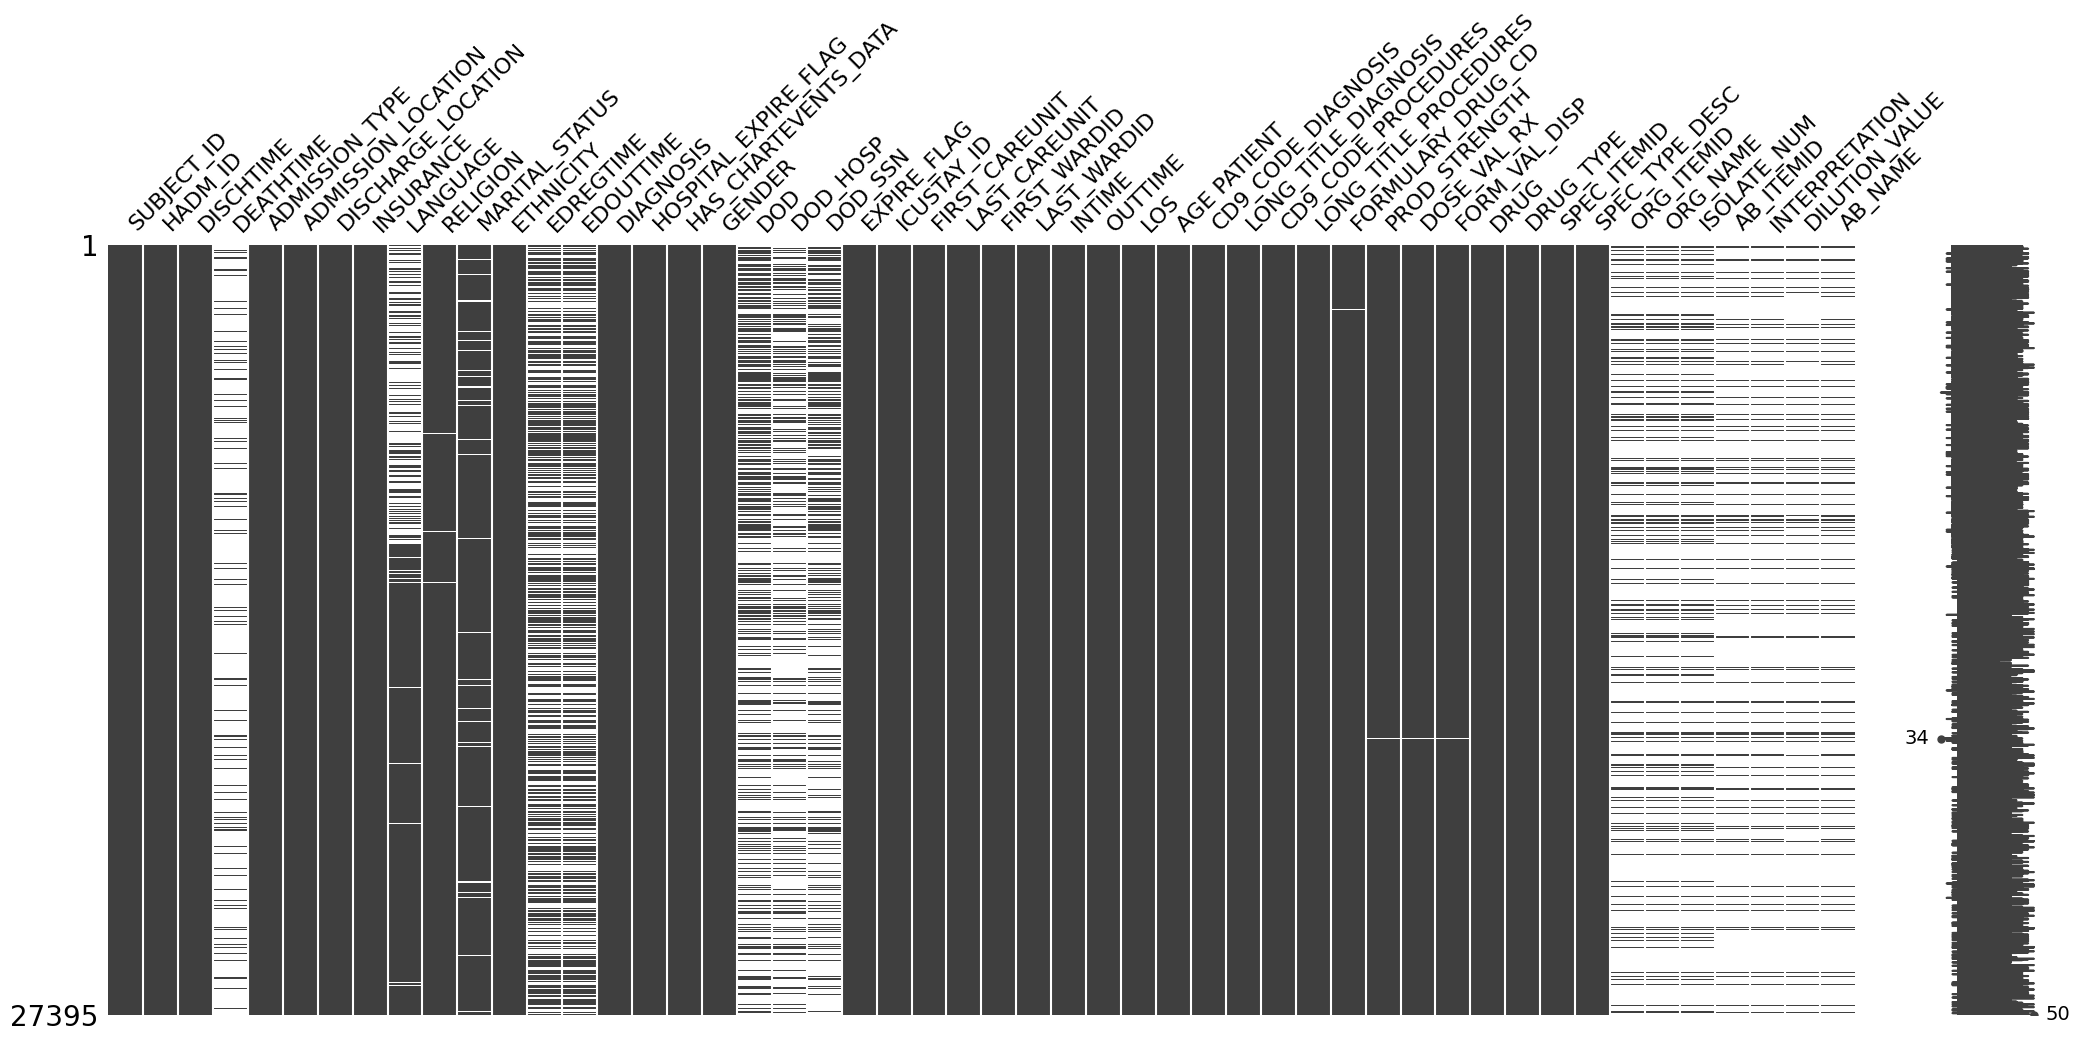

In [12]:
import missingno as msno
msno.matrix(copy_mimic)

In [13]:
# Liste des noms des colonnes à supprimer
colonnes_a_supprimer = ['DEATHTIME','EDREGTIME','EDOUTTIME','DOD','DISCHTIME','DOD_HOSP','DOD_SSN']

#Supprimer plusieurs colonnes simultanément
copy_mimic = copy_mimic.drop(columns=colonnes_a_supprimer)

In [14]:
# List of column names to be removed
colonnes_a_supprimer = ['HADM_ID', 'ICUSTAY_ID', 'FIRST_CAREUNIT', 'LAST_CAREUNIT', 'FIRST_WARDID', 'LAST_WARDID', 'INTIME', 'OUTTIME']

# Remove multiple columns simultaneously from the copy_mimic DataFrame
copy_mimic = copy_mimic.drop(columns=colonnes_a_supprimer)


In [15]:
copy_mimic.shape

(27395, 35)

In [16]:
copy_mimic.head()

,SUBJECT_ID,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA,GENDER,EXPIRE_FLAG,LOS,AGE PATIENT,CD9_CODE_DIAGNOSIS,LONG_TITLE_DIAGNOSIS,CD9_CODE_PROCEDURES,LONG_TITLE_PROCEDURES,FORMULARY_DRUG_CD,PROD_STRENGTH,DOSE_VAL_RX,FORM_VAL_DISP,DRUG,DRUG_TYPE,SPEC_ITEMID,SPEC_TYPE_DESC,ORG_ITEMID,ORG_NAME,ISOLATE_NUM,AB_ITEMID,INTERPRETATION,DILUTION_VALUE,AB_NAME
0,23,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,NaN,CATHOLIC,MARRIED,WHITE,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,0,1,1,0,1.2641,71,41401,Coronary atherosclerosis of native coronary ar...,151,Excision of lesion or tissue of cerebral meninges,SW50,50 mL Bag,50,1,SW,BASE,70064.0,STOOL,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,ACUTE CORONARY SYNDROME,0,1,1,0,3.5466,59,41071,"Subendocardial infarction, initial episode of ...",3607,Insertion of drug-eluting coronary artery sten...,HEPAPREMIX,"25,000 unit Premix Bag","25,000",1,Heparin Sodium,MAIN,70012.0,BLOOD CULTURE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,26,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Medicare,NaN,CATHOLIC,SINGLE,UNKNOWN/NOT SPECIFIED,V-TACH,0,1,1,1,2.1407,72,41401,Coronary atherosclerosis of native coronary ar...,3794,Implantation or replacement of automatic cardi...,DOFE250,250MCG CAP,250,1,Dofetilide,MAIN,70012.0,BLOOD CULTURE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,31,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Medicare,NaN,CATHOLIC,MARRIED,WHITE,STATUS EPILEPTICUS,1,1,1,1,7.9379,73,486,"Pneumonia, organism unspecified",114,Open biopsy of brain,PHEN130I,130mg/mL Vial,400,3.08,Phenobarbital Sodium,MAIN,70012.0,BLOOD CULTURE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,34,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,CHEST PAIN\CATH,0,1,1,1,0.7198,26,4254,Other primary cardiomyopathies,3723,Combined right and left heart cardiac catheter...,D5W1000,1000mL Bag,1000,1000,D5W,BASE,70091.0,MRSA SCREEN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Handling Null Values

Pour cette tâche, gérez les valeurs manquantes en utilisant une stratégie d'imputation appropriée (au lieu de supprimer des lignes).


In [17]:
copy_mimic.shape

(27395, 35)

In [ ]:
# Check for duplicates and missing values
print('Missing data:\n', copy_mimic .isna().sum())
print('\n')
print('Duplicates:', copy_mimic .duplicated().sum())

Missing data:
 SUBJECT_ID                   0
ADMISSION_TYPE               0
ADMISSION_LOCATION           0
DISCHARGE_LOCATION           0
INSURANCE                    0
LANGUAGE                  8304
RELIGION                    33
MARITAL_STATUS            1382
ETHNICITY                    0
DIAGNOSIS                   13
HOSPITAL_EXPIRE_FLAG         0
HAS_CHARTEVENTS_DATA         0
GENDER                       0
EXPIRE_FLAG                  0
LOS                          0
AGE PATIENT                  0
CD9_CODE_DIAGNOSIS           0
LONG_TITLE_DIAGNOSIS         0
CD9_CODE_PROCEDURES          0
LONG_TITLE_PROCEDURES        0
FORMULARY_DRUG_CD           19
PROD_STRENGTH                9
DOSE_VAL_RX                  9
FORM_VAL_DISP                9
DRUG                         0
DRUG_TYPE                    0
SPEC_ITEMID                  2
SPEC_TYPE_DESC               0
ORG_ITEMID               22473
ORG_NAME                 22457
ISOLATE_NUM              22457
AB_ITEMID               

In [18]:
# Supprimer les lignes où FORMULARY_DRUG_CD est nulle
copy_mimic= copy_mimic.dropna(subset=['FORMULARY_DRUG_CD'])


In [19]:
# Impute missing values with the mode for categorical variables
copy_mimic['LANGUAGE'].fillna(copy_mimic['LANGUAGE'].mode()[0], inplace=True)
copy_mimic['AB_NAME'].fillna(copy_mimic['AB_NAME'].mode()[0], inplace=True)
copy_mimic['ORG_NAME'].fillna(copy_mimic['ORG_NAME'].mode()[0], inplace=True)
copy_mimic['INTERPRETATION'].fillna(copy_mimic['INTERPRETATION'].mode()[0], inplace=True)

<ipython-input-19-794503e68333>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copy_mimic['LANGUAGE'].fillna(copy_mimic['LANGUAGE'].mode()[0], inplace=True)
<ipython-input-19-794503e68333>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copy_mimic['AB_NAME'].fillna(copy_mimic['AB_NAME'].mode()[0], inplace=True)
<ipython-input-19-794503e68333>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copy_mimic['ORG_NAME'].fillna(copy_mimic['

In [20]:
mimic_V1=copy_mimic.copy()

In [21]:
# Impute missing values with the mean for numerciale variables
mimic_V1['DILUTION_VALUE'].fillna(mimic_V1['DILUTION_VALUE'].mean(), inplace=True)
mimic_V1['AB_ITEMID'].fillna(mimic_V1['AB_ITEMID'].mean(), inplace=True)
mimic_V1['ORG_ITEMID'].fillna(mimic_V1['ORG_ITEMID'].mean(), inplace=True)
mimic_V1['ISOLATE_NUM'].fillna(mimic_V1['ISOLATE_NUM'].mean(), inplace=True)

In [ ]:
# Check for duplicates and missing values
print('Missing data:\n', mimic_V1 .isna().sum())
print('\n')
print('Duplicates:', mimic_V1 .duplicated().sum())

Missing data:
 SUBJECT_ID                  0
ADMISSION_TYPE              0
ADMISSION_LOCATION          0
DISCHARGE_LOCATION          0
INSURANCE                   0
LANGUAGE                    0
RELIGION                   33
MARITAL_STATUS           1381
ETHNICITY                   0
DIAGNOSIS                  13
HOSPITAL_EXPIRE_FLAG        0
HAS_CHARTEVENTS_DATA        0
GENDER                      0
EXPIRE_FLAG                 0
LOS                         0
AGE PATIENT                 0
CD9_CODE_DIAGNOSIS          0
LONG_TITLE_DIAGNOSIS        0
CD9_CODE_PROCEDURES         0
LONG_TITLE_PROCEDURES       0
FORMULARY_DRUG_CD           0
PROD_STRENGTH               9
DOSE_VAL_RX                 9
FORM_VAL_DISP               9
DRUG                        0
DRUG_TYPE                   0
SPEC_ITEMID                 2
SPEC_TYPE_DESC              0
ORG_ITEMID                  0
ORG_NAME                    0
ISOLATE_NUM                 0
AB_ITEMID                   0
INTERPRETATION           

In [22]:
# Supprimer les lignes contenant des valeurs nulles
mimic_V1.dropna(axis=0, inplace=True)
mimic_V1.shape

(25955, 35)

<Axes: >

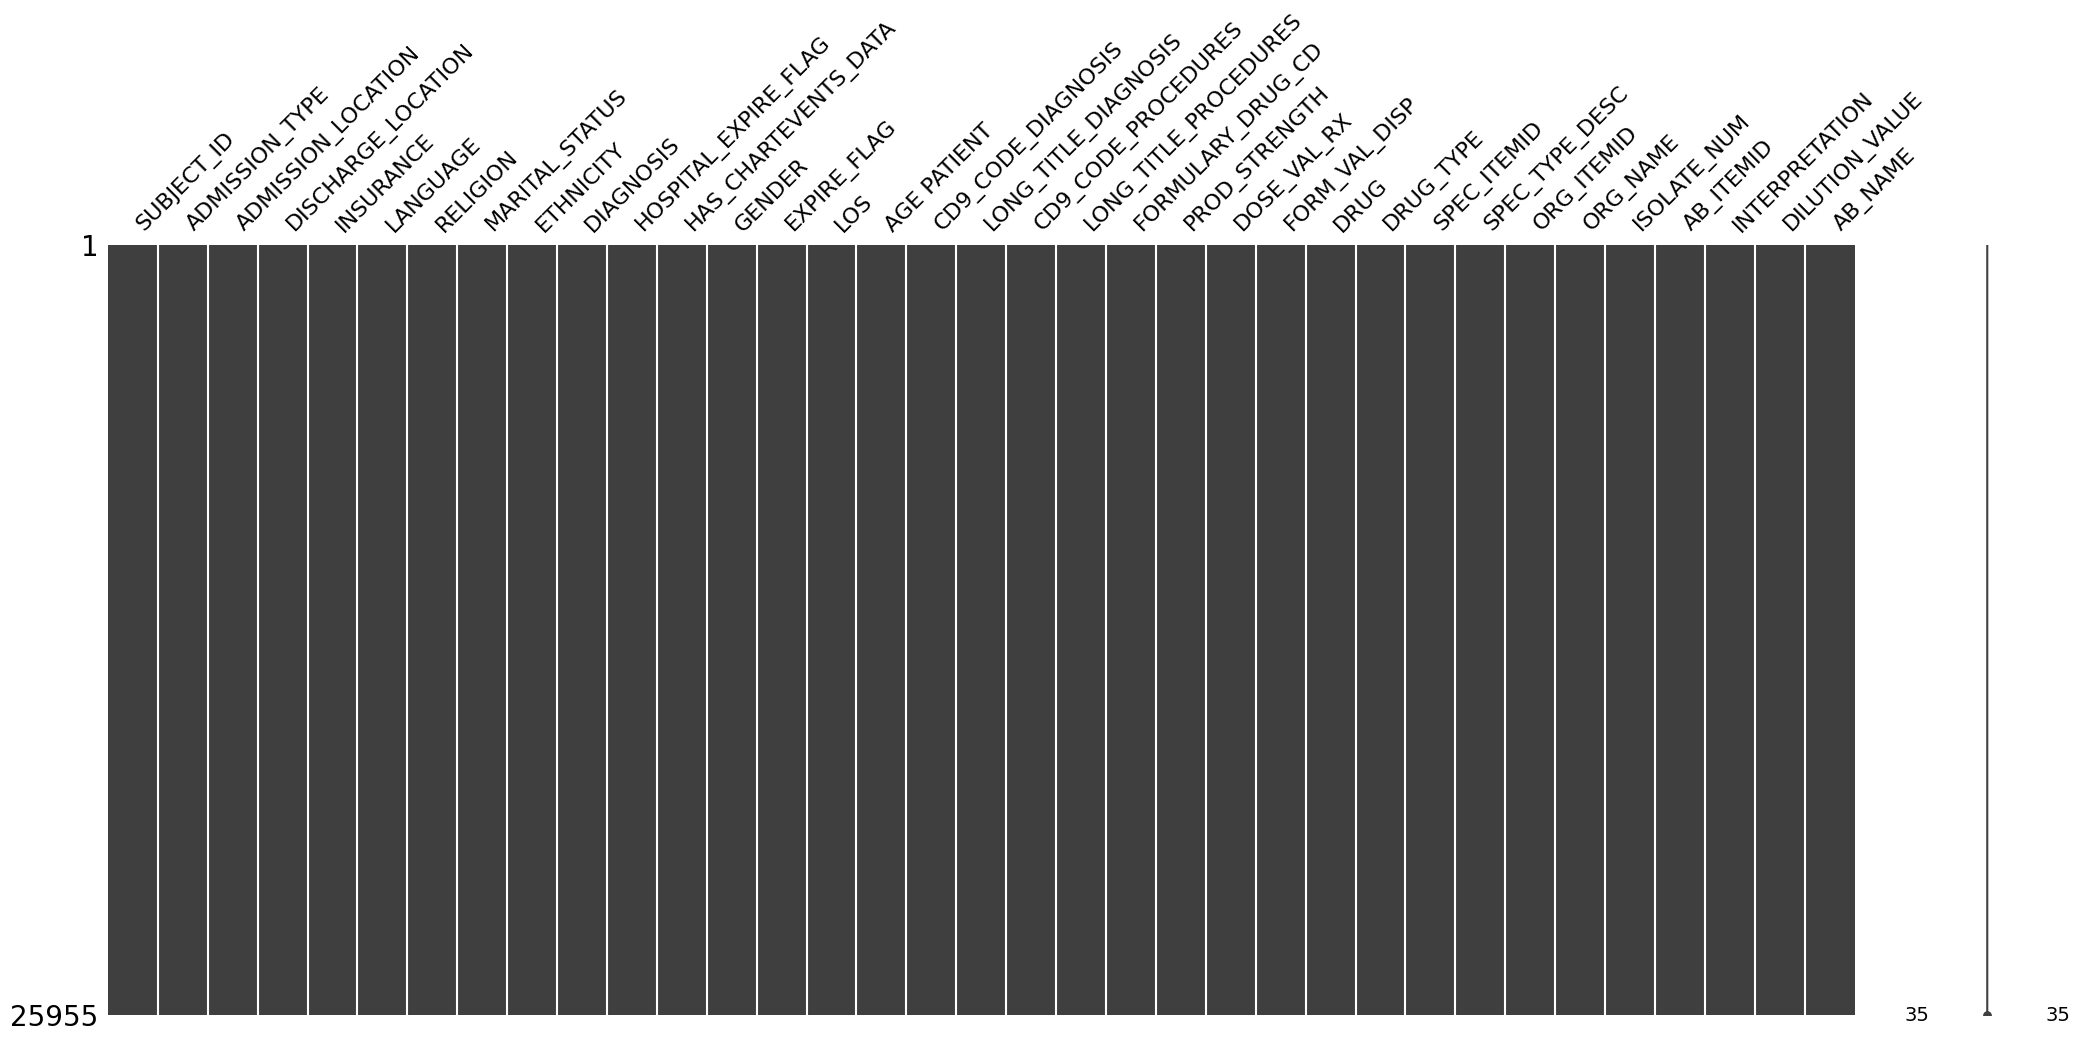

In [23]:
import missingno as msno
msno.matrix(mimic_V1)

In [24]:
# Définir l'ordre des colonnes
new_order = ['SUBJECT_ID','ADMISSION_TYPE','ADMISSION_LOCATION','GENDER','MARITAL_STATUS','RELIGION','ETHNICITY','LANGUAGE','AGE PATIENT','INSURANCE','DISCHARGE_LOCATION','DIAGNOSIS','HOSPITAL_EXPIRE_FLAG','HAS_CHARTEVENTS_DATA','EXPIRE_FLAG','CD9_CODE_DIAGNOSIS','LONG_TITLE_DIAGNOSIS','CD9_CODE_PROCEDURES','LONG_TITLE_PROCEDURES','FORMULARY_DRUG_CD','PROD_STRENGTH','DOSE_VAL_RX','FORM_VAL_DISP','LOS','SPEC_ITEMID','SPEC_TYPE_DESC','ORG_ITEMID','ORG_NAME','ISOLATE_NUM','AB_ITEMID','INTERPRETATION','DILUTION_VALUE','AB_NAME','DRUG_TYPE','DRUG']

In [25]:
# Réorganiser les colonnes
mimic_V1 = mimic_V1[new_order]

**Univariate Visualization**


In [26]:
# Display the range of values in the 'AGE PATIENT' column
print("Range of values in 'Age' column:", copy_mimic['AGE PATIENT'].min(), "-", copy_mimic['AGE PATIENT'].max())

# Calculate the maximum and minimum ages
max_age = mimic_V1['AGE PATIENT'].max()
min_age = mimic_V1['AGE PATIENT'].min()

# Print the maximum and minimum ages
print(f"Max age: {max_age}")
print(f"Min age: {min_age}")


Range of values in 'Age' column: 15 - 146
Max age: 146
Min age: 15


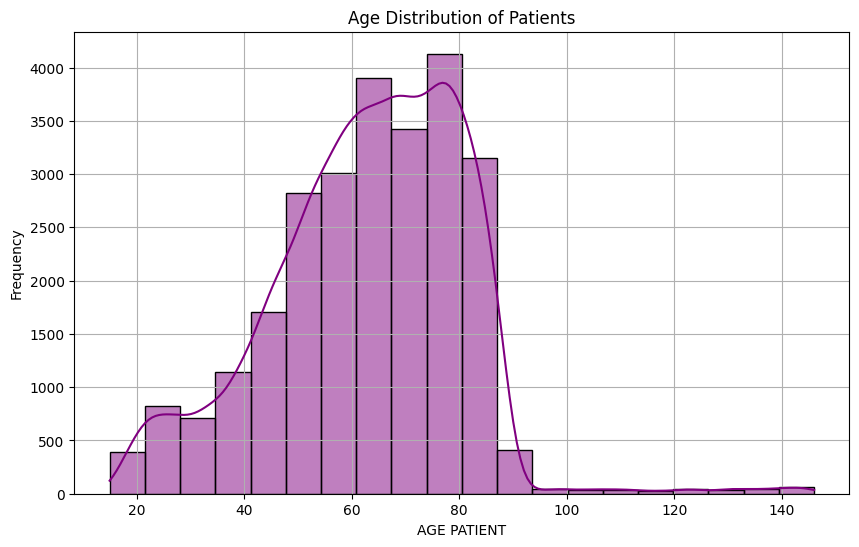

<Figure size 640x480 with 0 Axes>

In [40]:
# Visualization 1: Histogram of Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=mimic_V1, x='AGE PATIENT', bins=20, kde=True, color='purple')
plt.title('Age Distribution of Patients')
plt.xlabel('AGE PATIENT')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
# Save the plot as a high-quality JPG file
plt.savefig('Fig2.jpg', dpi=300)
plt.show()

In [ ]:
# Set an upper limit for age
age_upper_limit = 90

In [ ]:
# Correct any values beyond the reasonable limits
mimic_V1.loc[mimic_V1['AGE PATIENT']> age_upper_limit, 'AGE PATIENT'] = age_upper_limit

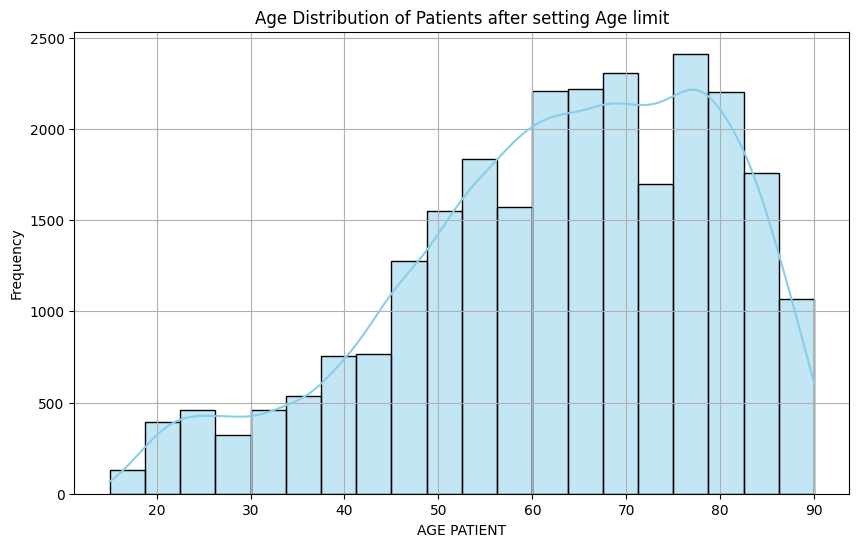

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming mimic_V1 is your dataframe with the relevant data
plt.figure(figsize=(10, 6))
sns.histplot(data=mimic_V1, x='AGE PATIENT', bins=20, kde=True, color='skyblue')
plt.title('Age Distribution of Patients after setting Age limit')
plt.xlabel('AGE PATIENT')
plt.ylabel('Frequency')
plt.grid(True)

# Save the plot as a high-quality JPG file
plt.savefig('age_distribution_high_quality.jpg', dpi=300)
plt.show()


In [ ]:
mimic_V1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25955 entries, 0 to 27394
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SUBJECT_ID             25955 non-null  int64  
 1   ADMISSION_TYPE         25955 non-null  object 
 2   ADMISSION_LOCATION     25955 non-null  object 
 3   GENDER                 25955 non-null  int64  
 4   MARITAL_STATUS         25955 non-null  object 
 5   RELIGION               25955 non-null  object 
 6   ETHNICITY              25955 non-null  object 
 7   LANGUAGE               25955 non-null  object 
 8   AGE PATIENT            25955 non-null  int64  
 9   INSURANCE              25955 non-null  object 
 10  DISCHARGE_LOCATION     25955 non-null  object 
 11  DIAGNOSIS              25955 non-null  object 
 12  HOSPITAL_EXPIRE_FLAG   25955 non-null  int64  
 13  HAS_CHARTEVENTS_DATA   25955 non-null  int64  
 14  EXPIRE_FLAG            25955 non-null  int64  
 15  CD9_COD

In [ ]:
mimic_V1.shape

#  Handling Unspecified values

In [ ]:
# Check for inconsistent values in categorical columns
print("Unique values in 'MARITAL_STATUS column:", mimic_V1['MARITAL_STATUS'].unique())

In [ ]:
# Assuming 'mimic_V1' is your DataFrame
print("Unique values in 'ADMISSION_TYPE' column:", mimic_V1['ADMISSION_TYPE'].unique())


In [ ]:
# Check for inconsistent values in categorical columns
print("Unique values in 'ADMISSION_LOCATION column:", mimic_V1['ADMISSION_LOCATION'].unique())

Unique values in 'ADMISSION_LOCATION column: ['PHYS REFERRAL/NORMAL DELI' 'EMERGENCY ROOM ADMIT'
 'TRANSFER FROM HOSP/EXTRAM' 'CLINIC REFERRAL/PREMATURE'
 'TRANSFER FROM SKILLED NUR' 'TRANSFER FROM OTHER HEALT'
 '** INFO NOT AVAILABLE **' 'TRSF WITHIN THIS FACILITY']


In [ ]:
# Check for inconsistent values in categorical columns
print("Unique values in 'RELIGION column:", mimic_V1['RELIGION'].unique())

Unique values in 'RELIGION column: ['CATHOLIC' 'UNOBTAINABLE' 'NOT SPECIFIED' 'JEWISH' 'PROTESTANT QUAKER'
 "JEHOVAH'S WITNESS" 'OTHER' 'GREEK ORTHODOX' 'EPISCOPALIAN' 'BUDDHIST'
 'CHRISTIAN SCIENTIST' 'UNITARIAN-UNIVERSALIST' '7TH DAY ADVENTIST'
 'ROMANIAN EAST. ORTH' 'HINDU' 'MUSLIM' 'BAPTIST' 'HEBREW']


In [ ]:
# Check for inconsistent values in categorical columns
print("Unique values in 'ETHNICITY:", mimic_V1['ETHNICITY'].unique())

Unique values in 'ETHNICITY: ['WHITE' 'UNKNOWN/NOT SPECIFIED' 'MULTI RACE ETHNICITY'
 'PATIENT DECLINED TO ANSWER' 'BLACK/AFRICAN AMERICAN' 'ASIAN'
 'HISPANIC OR LATINO' 'HISPANIC/LATINO - GUATEMALAN' 'OTHER'
 'ASIAN - VIETNAMESE' 'HISPANIC/LATINO - PUERTO RICAN'
 'ASIAN - ASIAN INDIAN' 'HISPANIC/LATINO - DOMINICAN' 'UNABLE TO OBTAIN'
 'WHITE - RUSSIAN' 'ASIAN - CHINESE' 'AMERICAN INDIAN/ALASKA NATIVE'
 'HISPANIC/LATINO - SALVADORAN' 'BLACK/HAITIAN' 'WHITE - EASTERN EUROPEAN'
 'ASIAN - FILIPINO' 'ASIAN - CAMBODIAN' 'BLACK/CAPE VERDEAN'
 'HISPANIC/LATINO - CENTRAL AMERICAN (OTHER)' 'WHITE - BRAZILIAN'
 'HISPANIC/LATINO - COLOMBIAN' 'PORTUGUESE' 'WHITE - OTHER EUROPEAN'
 'HISPANIC/LATINO - HONDURAN' 'NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER'
 'MIDDLE EASTERN' 'BLACK/AFRICAN' 'ASIAN - OTHER'
 'HISPANIC/LATINO - CUBAN' 'CARIBBEAN ISLAND' 'HISPANIC/LATINO - MEXICAN'
 'SOUTH AMERICAN' 'ASIAN - KOREAN' 'ASIAN - THAI'
 'AMERICAN INDIAN/ALASKA NATIVE FEDERALLY RECOGNIZED TRIBE'
 'ASIAN - JAPAN

In [ ]:
mimic_V1.shape

(25955, 35)

# data quality control

In [ ]:
 print("Unique values in 'DIAGNOSIS' column:", mimic_V1['DIAGNOSIS'].unique())

Unique values in 'DIAGNOSIS' column: ['CORONARY ARTERY DISEASE\\CORONARY ARTERY BYPASS GRAFT/SDA'
 'ACUTE CORONARY SYNDROME' 'V-TACH' ... 'R/O METASTASIS'
 'GASTROPARESIS\\PLACEMENT OF G-TUBE **REMOTE WEST**/SDA' 'JOINT EFFUSION']


In [ ]:
# Remplacer '\\' par un espace dans la colonne "DIAGNOSIS"
mimic_V1['DIAGNOSIS'] = mimic_V1['DIAGNOSIS'].str.replace(r'**', ' ')
mimic_V1['DIAGNOSIS'] = mimic_V1['DIAGNOSIS'].str.replace(r'\\', ' ')
mimic_V1['DIAGNOSIS'] = mimic_V1['DIAGNOSIS'].str.replace(r'/', ' ')
mimic_V1['DIAGNOSIS'] = mimic_V1['DIAGNOSIS'].str.replace(r'-', ' ')
mimic_V1['DIAGNOSIS'] = mimic_V1['DIAGNOSIS'].str.replace(r';', ' ')
mimic_V1['DIAGNOSIS'] = mimic_V1['DIAGNOSIS'].str.replace(r'...', ' ')

In [ ]:
# Remplacer '\\' par un espace dans la colonne "LONG_TITLE_DIAGNOSIS"
mimic_V1['LONG_TITLE_DIAGNOSIS'] = mimic_V1['LONG_TITLE_DIAGNOSIS'].str.replace(r'(', ' ')
mimic_V1['LONG_TITLE_DIAGNOSIS'] = mimic_V1['LONG_TITLE_DIAGNOSIS'].str.replace(r')', ' ')
mimic_V1['LONG_TITLE_DIAGNOSIS'] = mimic_V1['LONG_TITLE_DIAGNOSIS'].str.replace(r']', ' ')
mimic_V1['LONG_TITLE_DIAGNOSIS'] = mimic_V1['LONG_TITLE_DIAGNOSIS'].str.replace(r'[', ' ')
mimic_V1['LONG_TITLE_DIAGNOSIS'] = mimic_V1['LONG_TITLE_DIAGNOSIS'].str.replace(r',', ' ')
mimic_V1['LONG_TITLE_DIAGNOSIS'] = mimic_V1['LONG_TITLE_DIAGNOSIS'].str.replace(r'.', ' ')

In [ ]:
# Remplacer '\\' par un espace dans la colonne "LONG_TITLE_PROCEDURES"
mimic_V1['LONG_TITLE_PROCEDURES'] = mimic_V1['LONG_TITLE_PROCEDURES'].str.replace(r'(', ' ')
mimic_V1['LONG_TITLE_PROCEDURES'] = mimic_V1['LONG_TITLE_PROCEDURES'].str.replace(r')', ' ')
mimic_V1['LONG_TITLE_PROCEDURES'] = mimic_V1['LONG_TITLE_PROCEDURES'].str.replace(r']', ' ')
mimic_V1['LONG_TITLE_PROCEDURES'] = mimic_V1['LONG_TITLE_PROCEDURES'].str.replace(r'[', ' ')
mimic_V1['LONG_TITLE_PROCEDURES'] = mimic_V1['LONG_TITLE_PROCEDURES'].str.replace(r',', ' ')
mimic_V1['LONG_TITLE_PROCEDURES'] = mimic_V1['LONG_TITLE_PROCEDURES'].str.replace(r'.', ' ')

In [ ]:
mimic_V1 .shape

(25955, 35)

# Target and Features

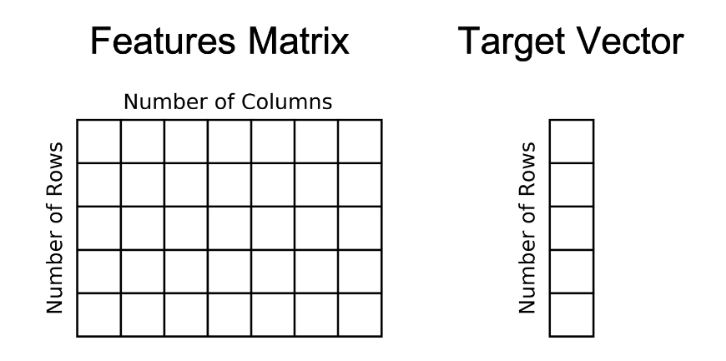

In [ ]:
# Diviser le DataFrame en features et target
features= mimic_V1.drop(columns=['DRUG'])  # Features
Target= mimic_V1['DRUG']   # Target variable
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
features.head()

,SUBJECT_ID,ADMISSION_TYPE,ADMISSION_LOCATION,GENDER,MARITAL_STATUS,RELIGION,ETHNICITY,LANGUAGE,AGE PATIENT,INSURANCE,DISCHARGE_LOCATION,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA,EXPIRE_FLAG,CD9_CODE_DIAGNOSIS,LONG_TITLE_DIAGNOSIS,CD9_CODE_PROCEDURES,LONG_TITLE_PROCEDURES,FORMULARY_DRUG_CD,PROD_STRENGTH,DOSE_VAL_RX,FORM_VAL_DISP,LOS,SPEC_ITEMID,SPEC_TYPE_DESC,ORG_ITEMID,ORG_NAME,ISOLATE_NUM,AB_ITEMID,INTERPRETATION,DILUTION_VALUE,AB_NAME,DRUG_TYPE
0,23,ELECTIVE,PHYS REFERRAL/NORMAL DELI,1,MARRIED,CATHOLIC,WHITE,ENGL,71,Medicare,HOME HEALTH CARE,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,0,1,0,41401,Coronary atherosclerosis of native coronary ar...,151,Excision of lesion or tissue of cerebral meninges,SW50,50 mL Bag,50,1,1.2641,70064.0,STOOL,80076.062411,STAPH AUREUS COAG +,1.064438,90015.726473,S,6.596758,GENTAMICIN,BASE
1,25,EMERGENCY,EMERGENCY ROOM ADMIT,1,MARRIED,UNOBTAINABLE,WHITE,ENGL,59,Private,HOME,ACUTE CORONARY SYNDROME,0,1,0,41071,Subendocardial infarction initial episode of ...,3607,Insertion of drug-eluting coronary artery sten...,HEPAPREMIX,"25,000 unit Premix Bag","25,000",1,3.5466,70012.0,BLOOD CULTURE,80076.062411,STAPH AUREUS COAG +,1.064438,90015.726473,S,6.596758,GENTAMICIN,MAIN
2,26,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,1,SINGLE,CATHOLIC,UNKNOWN/NOT SPECIFIED,ENGL,72,Medicare,HOME,V TACH,0,1,1,41401,Coronary atherosclerosis of native coronary ar...,3794,Implantation or replacement of automatic cardi...,DOFE250,250MCG CAP,250,1,2.1407,70012.0,BLOOD CULTURE,80076.062411,STAPH AUREUS COAG +,1.064438,90015.726473,S,6.596758,GENTAMICIN,MAIN
3,31,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,1,MARRIED,CATHOLIC,WHITE,ENGL,73,Medicare,DEAD/EXPIRED,STATUS EPILEPTICUS,1,1,1,486,Pneumonia organism unspecified,114,Open biopsy of brain,PHEN130I,130mg/mL Vial,400,3.08,7.9379,70012.0,BLOOD CULTURE,80076.062411,STAPH AUREUS COAG +,1.064438,90015.726473,S,6.596758,GENTAMICIN,MAIN
4,34,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,1,MARRIED,CATHOLIC,WHITE,ENGL,26,Medicare,HOME,CHEST PAIN\CATH,0,1,1,4254,Other primary cardiomyopathies,3723,Combined right and left heart cardiac catheter...,D5W1000,1000mL Bag,1000,1000,0.7198,70091.0,MRSA SCREEN,80076.062411,STAPH AUREUS COAG +,1.064438,90015.726473,S,6.596758,GENTAMICIN,BASE



## Data transformation


* **Standardization**
* **Pipelines**


Standardizing is one of several kinds of scaling. It means scaling the values so that the distribution has a standard deviation of 1 with a mean of 0. It outputs something very close to a normal distribution

In [ ]:
# PIPELINE DE PRÉTRAITEMENT DES DONNÉES NUMÉRIQUES
# Enregistrer la liste des noms de colonnes
num_cols = features.select_dtypes("number").columns
print("Numeric Columns:", num_cols)
# instantiate preprocessors
scaler = MinMaxScaler()
# Make a numeric preprocessing pipeline
num_pipe = make_pipeline(scaler)
num_pipe



Numeric Columns: Index(['SUBJECT_ID', 'GENDER', 'AGE PATIENT', 'HOSPITAL_EXPIRE_FLAG',
       'HAS_CHARTEVENTS_DATA', 'EXPIRE_FLAG', 'CD9_CODE_PROCEDURES', 'LOS',
       'SPEC_ITEMID', 'ORG_ITEMID', 'ISOLATE_NUM', 'AB_ITEMID',
       'DILUTION_VALUE'],
      dtype='object')


Pipeline(steps=[('minmaxscaler', MinMaxScaler())])

In [ ]:
# Créer un tuple numérique pour ColumnTransformer
num_tuple = (' numeric', num_pipe, num_cols)
num_tuple


(' numeric',
 Pipeline(steps=[('minmaxscaler', MinMaxScaler())]),
 Index(['SUBJECT_ID', 'GENDER', 'AGE PATIENT', 'HOSPITAL_EXPIRE_FLAG',
        'HAS_CHARTEVENTS_DATA', 'EXPIRE_FLAG', 'CD9_CODE_PROCEDURES', 'LOS',
        'SPEC_ITEMID', 'ORG_ITEMID', 'ISOLATE_NUM', 'AB_ITEMID',
        'DILUTION_VALUE'],
       dtype='object'))

* **One-Hot Encoding**

In [ ]:
# PIPELINE DE PRÉTRAITEMENT POUR LES DONNÉES UNIQUEMENT CODÉES À CHAUD
# Enregistrer la liste des noms de colonnes
ohe_cols = features.select_dtypes('object').columns
print("OneHotEncoder Columns:", ohe_cols)
# Instantiate the individual preprocessors
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
# Make pipeline with imputer and encoder
ohe_pipe = make_pipeline(ohe_encoder)
ohe_pipe

OneHotEncoder Columns: Index(['ADMISSION_TYPE', 'ADMISSION_LOCATION', 'MARITAL_STATUS', 'RELIGION',
       'ETHNICITY', 'LANGUAGE', 'INSURANCE', 'DISCHARGE_LOCATION', 'DIAGNOSIS',
       'CD9_CODE_DIAGNOSIS', 'LONG_TITLE_DIAGNOSIS', 'LONG_TITLE_PROCEDURES',
       'FORMULARY_DRUG_CD', 'PROD_STRENGTH', 'DOSE_VAL_RX', 'FORM_VAL_DISP',
       'SPEC_TYPE_DESC', 'ORG_NAME', 'INTERPRETATION', 'AB_NAME', 'DRUG_TYPE'],
      dtype='object')


Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

In [ ]:
# Making a ohe_tuple for ColumnTransformer

ohe_tuple = ('categorical', ohe_pipe, ohe_cols)
ohe_tuple

('categorical',
 Pipeline(steps=[('onehotencoder',
                  OneHotEncoder(handle_unknown='ignore', sparse_output=False))]),
 Index(['ADMISSION_TYPE', 'ADMISSION_LOCATION', 'MARITAL_STATUS', 'RELIGION',
        'ETHNICITY', 'LANGUAGE', 'INSURANCE', 'DISCHARGE_LOCATION', 'DIAGNOSIS',
        'CD9_CODE_DIAGNOSIS', 'LONG_TITLE_DIAGNOSIS', 'LONG_TITLE_PROCEDURES',
        'FORMULARY_DRUG_CD', 'PROD_STRENGTH', 'DOSE_VAL_RX', 'FORM_VAL_DISP',
        'SPEC_TYPE_DESC', 'ORG_NAME', 'INTERPRETATION', 'AB_NAME', 'DRUG_TYPE'],
       dtype='object'))

**Column Transformer**


In [ ]:
# Instantiate with verbose_feature_names_out=False
col_transformer = ColumnTransformer([num_tuple, ohe_tuple],
                                    verbose_feature_names_out=False)

# Ajuster les données d'entraînement
col_transformer.fit(features)

ColumnTransformer(transformers=[(' numeric',
                                 Pipeline(steps=[('minmaxscaler',
                                                  MinMaxScaler())]),
                                 Index(['SUBJECT_ID', 'GENDER', 'AGE PATIENT', 'HOSPITAL_EXPIRE_FLAG',
       'HAS_CHARTEVENTS_DATA', 'EXPIRE_FLAG', 'CD9_CODE_PROCEDURES', 'LOS',
       'SPEC_ITEMID', 'ORG_ITEMID', 'ISOLATE_NUM', 'AB_ITEMID',
       'DILUTION_VALUE'],
      dtype='object')),
                                ('categorical',
                                 Pipeline(steps=[('onehot...
                                 Index(['ADMISSION_TYPE', 'ADMISSION_LOCATION', 'MARITAL_STATUS', 'RELIGION',
       'ETHNICITY', 'LANGUAGE', 'INSURANCE', 'DISCHARGE_LOCATION', 'DIAGNOSIS',
       'CD9_CODE_DIAGNOSIS', 'LONG_TITLE_DIAGNOSIS', 'LONG_TITLE_PROCEDURES',
       'FORMULARY_DRUG_CD', 'PROD_STRENGTH', 'DOSE_VAL_RX', 'FORM_VAL_DISP',
       'SPEC_TYPE_DESC', 'ORG_NAME', 'INTERPRETATION', 'AB_NAME', 'DRUG_TYPE'],
      dtype='object'))],
                  verbose_feature_names_out=False)

In [ ]:
# Transformer les données d'entraînement
X_train_processed_demo = col_transformer.transform(features)


In [ ]:
# Récupérer les noms des colonnes transformées
# Pour les colonnes numériques
num_feature_names = num_cols

# Pour les colonnes catégoriques après OneHotEncoding
ohe_feature_names = col_transformer.named_transformers_['categorical'].named_steps['onehotencoder'].get_feature_names_out(ohe_cols)

# Combiner les noms des colonnes transformées
columns_transformed = list(num_feature_names) + list(ohe_feature_names)

# Conversion des résultats en DataFrame pour un affichage plus lisible
features_processed_demo_df = pd.DataFrame(X_train_processed_demo, columns=columns_transformed)



In [ ]:
features_processed_demo_df.head()

In [ ]:
# Sélectionner 200 patients aléatoires
Medical_data_df=features_processed_demo_df.sample(n=250, random_state=1)

In [ ]:
# Enregistrement du DataFrame en fichier CSV
#Medical_data_df.to_csv('Medical_Data.csv', index=False)

print("Fichier CSV enregistré avec succès.")